Problem 2: 
Object localization

    a.Understand the definition of object localization : (url)
    
    b.Let’s now focus on the ILSVRC2012 dataset. Find the link in the imagenet website.
    
    c.Understand the annotation data for each image. You should find classification as well as bounding box information
    
    d.Pick 3 categories. Plot the annotations including the bounding box on randomly selected 10 images from each category.
    
    e.Given that a model is producing label + localization (i.e bounding box) information, how will you compare it against the ground truth. Matching labels is straightforward. But when the model is also giving a bounding box output, how is the quality of the bounding box evaluated? Hint : Find the bounding box overlap percentage. Write a python function which takes two bounding boxes as input and outputs the overlap percentage.


In [ ]:
!pip install matplotlib

In [1]:
# import the necessary modules
import os
import random
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define paths
image_folder = r"C:\Users\jalee\OneDrive\Desktop\ML\ImageLocalization\datasets"
annot_folder = r"C:\Users\jalee\OneDrive\Desktop\ML\ImageLocalization\annotations"

# Define a dictionary to map category IDs to their category names
category_map = {
    "n02442845": "mink",
    "n01560419": "bulbul",
    "n01580077": "jay"
}


In [2]:
# Function to calculate IoU (Intersection over Union)
def calculate_iou(box1, box2):
    
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    area_box1 = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    area_box2 = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    union_area = area_box1 + area_box2 - intersection_area

    iou = intersection_area / union_area if union_area > 0 else 0.0
    return iou

**calculate_iou function** takes two bounding boxes as input, represented as tuples or lists containing the coordinates (xmin, ymin, xmax, ymax) of each box.
It calculates the IoU using the formula:

                                             IoU = Intersection Area\Union Area 

Where:
- `Intersection Area` is calculated as the area of overlap between the two boxes, ensuring it's non-negative using `max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)`.
- `Union Area` is calculated as the sum of the areas of both boxes minus the intersection area to avoid double-counting.

The function returns the IoU as a float representing the overlap percentage between the two bounding boxes.

In [3]:
# Function to plot annotations and calculate IoU
def plot_annotations(images_folder, annotations_folder, category_id):
    category_name = category_map.get(category_id, "Unknown Category")  # Get the equivalent category name
    image_files = os.listdir(os.path.join(images_folder, category_id))
    random_images = random.sample(image_files, min(10, len(image_files)))

    for image in random_images:
        image_path = os.path.join(images_folder, category_id, image)
        img = plt.imread(image_path)

        xml_file = os.path.splitext(image)[0] + ".xml"
        xml_path = os.path.join(annotations_folder, category_id, "Annotation", category_id, xml_file)

        if os.path.isfile(xml_path):
            tree = ET.parse(xml_path)
            root = tree.getroot()

            fig, ax = plt.subplots(1)
            ax.imshow(img)

            # Ground truth bounding boxes
            gt_boxes = []
            for obj in root.findall('object'):
                xmin = int(obj.find('bndbox').find('xmin').text)
                ymin = int(obj.find('bndbox').find('ymin').text)
                xmax = int(obj.find('bndbox').find('xmax').text)
                ymax = int(obj.find('bndbox').find('ymax').text)
                gt_boxes.append([xmin, ymin, xmax, ymax])
                rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='g', facecolor='none', fill=False)
                ax.add_patch(rect)

            # Predicted bounding boxes (simulated)
            # For illustration purposes, we'll simulate predicted boxes as random boxes
            pred_boxes = []
            for idx in range(random.randint(1, 3)):  # Simulate 1 to 3 predicted boxes per image
                xmin = random.randint(0, img.shape[1] // 2)
                ymin = random.randint(0, img.shape[0] // 2)
                xmax = random.randint(img.shape[1] // 2, img.shape[1])
                ymax = random.randint(img.shape[0] // 2, img.shape[0])
                pred_boxes.append([xmin, ymin, xmax, ymax])
                rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none', fill=False)
                ax.add_patch(rect)
                ax.text(xmin, ymin, f'Box {idx+1}', bbox=dict(facecolor='white', alpha=0.5))

            # Calculate IoU for each predicted box with ground truth boxes
            for idx, pred_box in enumerate(pred_boxes):
                ious = [calculate_iou(pred_box, gt_box) for gt_box in gt_boxes]
                max_iou = max(ious)
                quality = "Good" if max_iou > 0.5 else "Poor"  # Assess quality based on IoU threshold
                print(f"Quality of predicted box {idx+1}: {quality} (Max IoU: {max_iou:.2f})")

            ax.set_title(category_name)  # Set the title to the category name
            ax.axis('off')
            plt.show()
        else:
            print(f"Annotation file not found for image: {image}")

**plot_annotations function:**
1. **Initialization**:
   - The function takes three arguments: `images_folder` (path to the folder containing image files), `annotations_folder` (path to the folder containing annotation XML files), and `category_id` (ID of the category being processed).
   - It retrieves the equivalent category name from `category_map` based on the `category_id`.

2. **Random Image Selection**:
   - It lists the image files in the specified category folder and randomly selects up to 10 images or all images if there are fewer than 10.

3. **Image Processing and Annotation**:
   - For each randomly selected image, it loads the image and constructs the path to the corresponding annotation XML file.
   - If the XML file exists, it parses the XML to extract ground truth bounding boxes (`gt_boxes`) and visualizes them on the image plot as green rectangles.

4. **Simulated Predicted Bounding Boxes**:
   - It generates simulated predicted bounding boxes (`pred_boxes`) as random rectangles (1 to 3 per image).
   - These predicted boxes are visualized on the image plot as red rectangles, along with text annotations indicating box indices.

5. **IoU Calculation and Quality Assessment**:
   - For each predicted box, it calculates the IoU with each ground truth box and determines the maximum IoU (`max_iou`).
   - Based on the IoU threshold (0.5), it assesses the quality of each predicted box as "Good" if `max_iou` > 0.5, otherwise "Poor".
   - It prints the quality assessment and maximum IoU for each predicted box.

6. **Plotting and Display**:
   - It sets the title of the plot to the category name, turns off axis labels, and displays the annotated image with ground truth and predicted bounding boxes.
   - If an annotation file is not found for an image, it prints a message indicating the missing file.

Annotation file not found for image: n02442845_21009.JPEG
Quality of predicted box 1: Poor (Max IoU: 0.45)


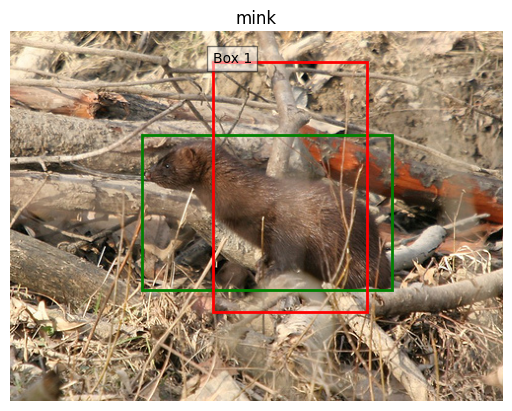

Annotation file not found for image: n02442845_10179.JPEG
Quality of predicted box 1: Poor (Max IoU: 0.25)
Quality of predicted box 2: Poor (Max IoU: 0.32)


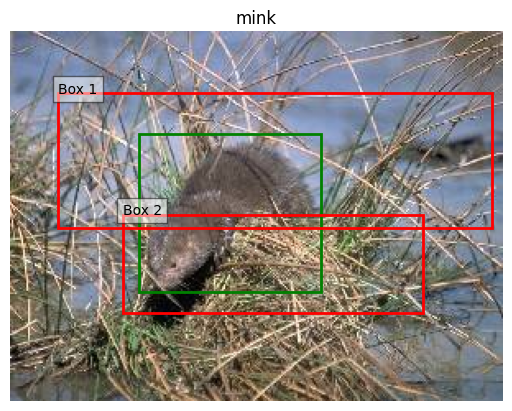

Annotation file not found for image: n02442845_5212.JPEG
Annotation file not found for image: n02442845_18835.JPEG
Annotation file not found for image: n02442845_1586.JPEG
Quality of predicted box 1: Poor (Max IoU: 0.40)
Quality of predicted box 2: Poor (Max IoU: 0.33)
Quality of predicted box 3: Poor (Max IoU: 0.46)


Annotation file not found for image: n02442845_1129.JPEG
Quality of predicted box 1: Poor (Max IoU: 0.00)


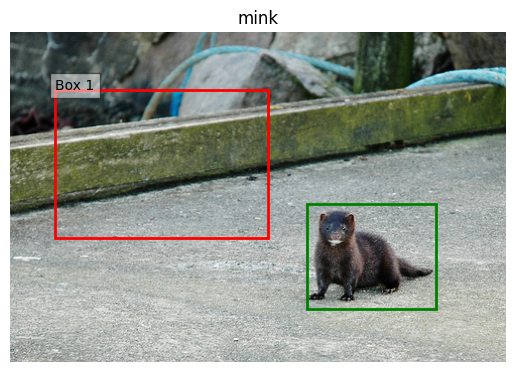

Annotation file not found for image: n01560419_2256.JPEG
Annotation file not found for image: n01560419_3067.JPEG
Quality of predicted box 1: Good (Max IoU: 0.54)
Quality of predicted box 2: Good (Max IoU: 0.60)


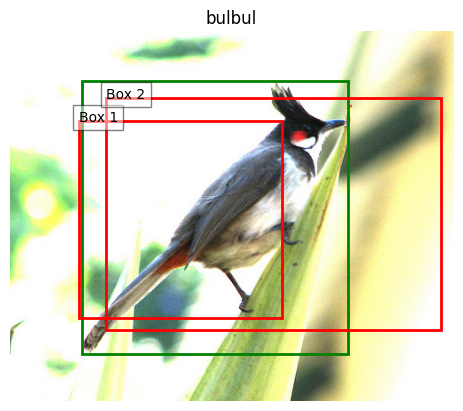

Annotation file not found for image: n01560419_4841.JPEG
Annotation file not found for image: n01560419_9146.JPEG
Quality of predicted box 1: Poor (Max IoU: 0.41)


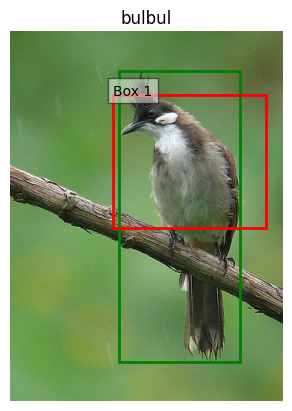

Annotation file not found for image: n01560419_231.JPEG
Annotation file not found for image: n01560419_3447.JPEG
Annotation file not found for image: n01560419_7528.JPEG
Quality of predicted box 1: Poor (Max IoU: 0.36)
Quality of predicted box 2: Poor (Max IoU: 0.23)
Quality of predicted box 3: Poor (Max IoU: 0.12)


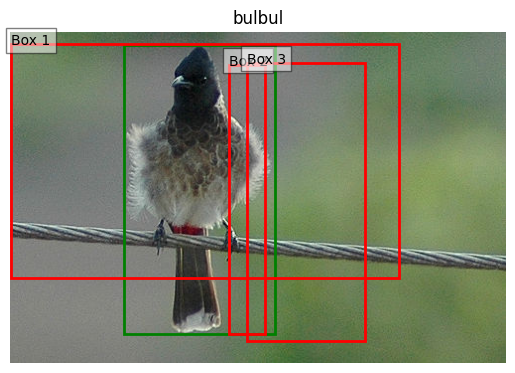

Annotation file not found for image: n01580077_2815.JPEG
Quality of predicted box 1: Good (Max IoU: 0.67)


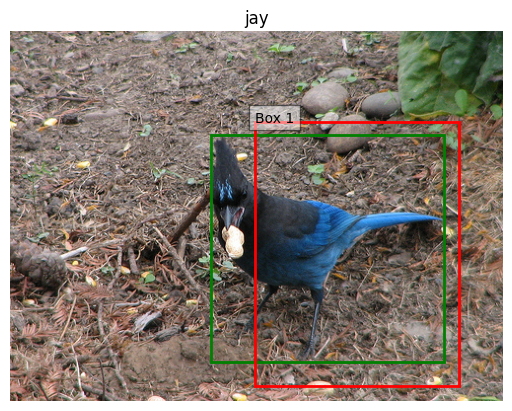

Quality of predicted box 1: Poor (Max IoU: 0.11)
Quality of predicted box 2: Poor (Max IoU: 0.17)


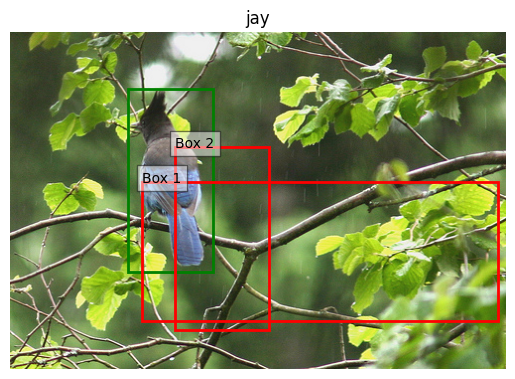

Quality of predicted box 1: Poor (Max IoU: 0.14)
Quality of predicted box 2: Poor (Max IoU: 0.35)
Quality of predicted box 3: Poor (Max IoU: 0.20)


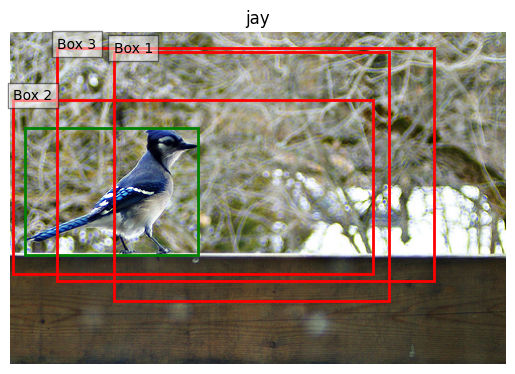

Annotation file not found for image: n01580077_6462.JPEG
Quality of predicted box 1: Poor (Max IoU: 0.35)
Quality of predicted box 2: Poor (Max IoU: 0.30)


Annotation file not found for image: n01580077_12496.JPEG
Annotation file not found for image: n01580077_6083.JPEG
Annotation file not found for image: n01580077_2361.JPEG
Annotation file not found for image: n01580077_13158.JPEG


In [4]:
# Plot annotations for each category
categories = ["n02442845", "n01560419", "n01580077"]
for category in categories:
    plot_annotations(image_folder, annot_folder, category)